In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

<Figure size 640x480 with 0 Axes>

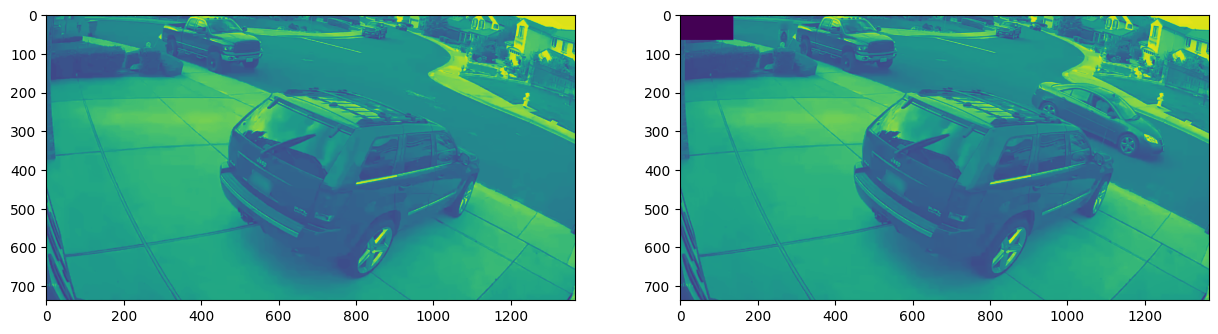

In [2]:
base = cv2.imread("base1.png", cv2.IMREAD_GRAYSCALE)
move = cv2.imread("move1.png", cv2.IMREAD_GRAYSCALE)

plt.figure()
f, ax = plt.subplots(1,2, figsize=(15, 10) )

ax[0].imshow(base)
ax[1].imshow(move)
plt.show()

<Figure size 640x480 with 0 Axes>

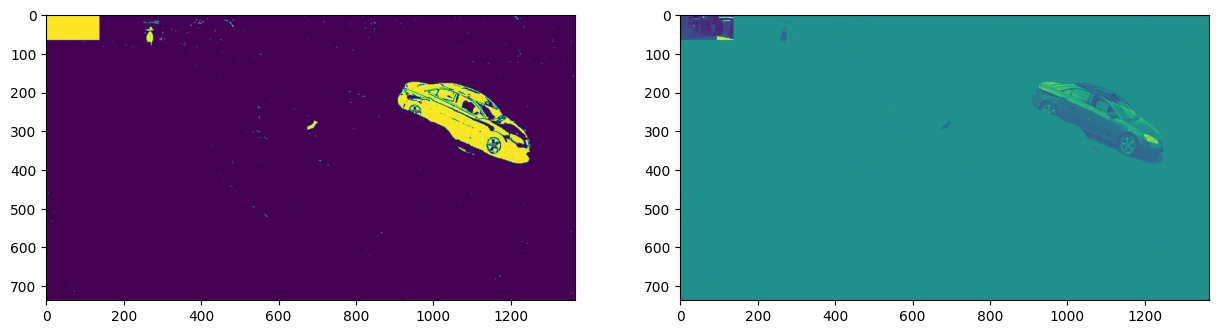

In [3]:
# calculate difference image
move = move.astype('int8')
base = base.astype('int8')
diff = move - base

notClosetozeroPos = diff > 20
notClosetozeroNeg = diff < -20
notClosetozero = np.logical_or(notClosetozeroPos, notClosetozeroNeg)
diff = diff * notClosetozero

# normalise between 0 - 255
diff = diff.astype('float')
diff_norm = (diff - np.min(diff)) / (np.max(diff) - np.min(diff)) * 255
diff_norm = diff_norm.astype('uint8')

plt.figure()
f, ax = plt.subplots(1,2, figsize=(15, 10) )

ax[0].imshow(notClosetozero)
ax[1].imshow(diff_norm)
plt.show()

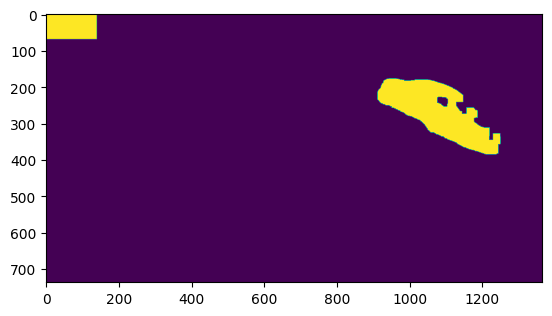

In [4]:
# clean the img
clean = notClosetozero.astype("uint8")

kernel = np.ones((10,10),np.uint8)
clean = cv2.morphologyEx(clean, cv2.MORPH_CLOSE, kernel)
kernel = np.ones((20,20),np.uint8)
clean = cv2.morphologyEx(clean, cv2.MORPH_OPEN, kernel)

# normalise between 0 - 255
clean = clean.astype('float')
clean = (clean - np.min(clean)) / (np.max(clean) - np.min(clean)) * 255
clean = clean.astype('uint8')

plt.imshow(clean)
plt.show()

<Figure size 640x480 with 0 Axes>

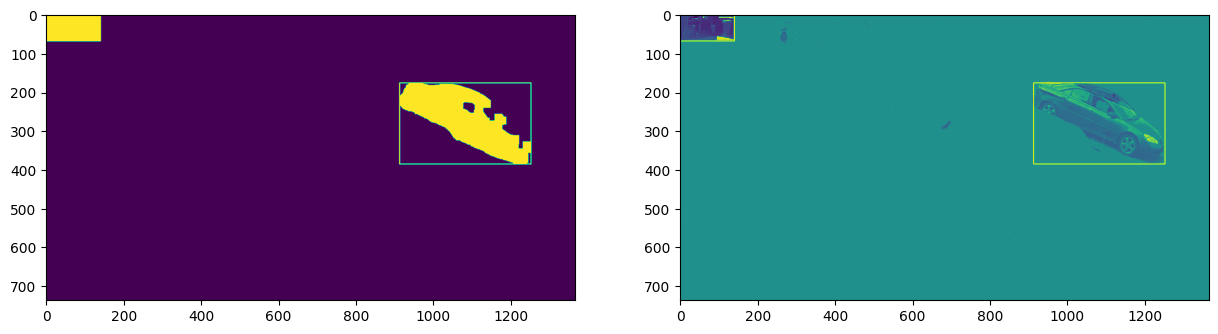

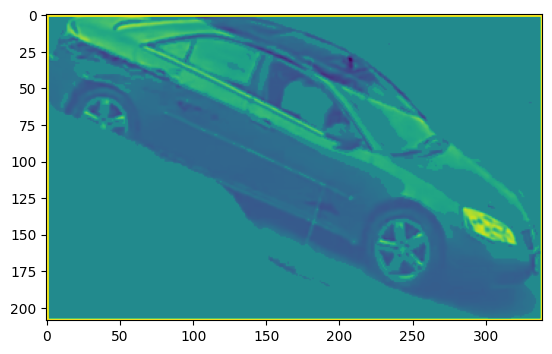

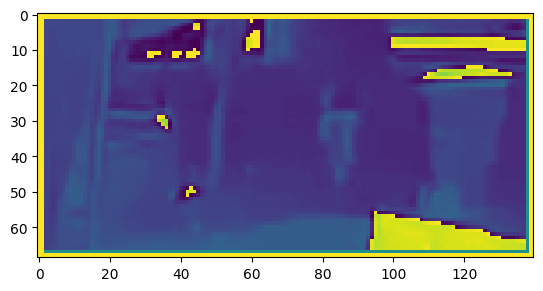

In [5]:
# get bounding box
img_boxes = clean
detected_imgs = []

contours, _ = cv2.findContours(clean, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
for cnt in contours:
    [x,y,w,h] = cv2.boundingRect(cnt)

    # get images within the bounding box
    im = diff_norm[y:y+h, x:x+w]
    detected_imgs.append(im)
    # draw the bounding rectangle
    img_boxes = cv2.rectangle(diff_norm, (x, y), (x+w, y+h), (255), 2)
    img_boxes_clean = cv2.rectangle(clean, (x, y), (x+w, y+h), (255), 2)
plt.figure()
f, ax = plt.subplots(1,2, figsize=(15, 10) )

ax[0].imshow(img_boxes_clean)
ax[1].imshow(img_boxes)
plt.show()

for im in detected_imgs:
    plt.imshow(im)
    plt.show()